# Agglomerative Clustering
**Author: Brett Walker**

**Student Number: u1118783**

In [1]:
# Load the required libraries
import pandas as pd
import numpy as np

from collections import Counter
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import matplotlib.cm as cm

pd.set_option('precision', 2)

In [2]:
# Read the current transformed exoplanet values
exoplanet_data = pd.read_pickle('exoplanet_cluster_input')

CPU times: user 6.86 ms, sys: 2.95 ms, total: 9.82 ms
Wall time: 51.1 ms
linkage complete n clusters 24
Silhouette coefficient 0.19884135335257513
Calinski Harabasz_score 114.27019114873049
       cluster_size
count         24.00
mean          15.50
std           22.96
min            1.00
25%            4.75
50%            7.00
75%           12.50
max           97.00


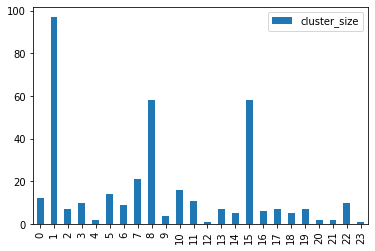

In [3]:
# Mulitple attempts found that complete linkage and a cluster size of 24 were the best
linkage='complete'
n_cluster= 24

# Time the clustering attempt
%time ap = AgglomerativeClustering(linkage=linkage, n_clusters=n_cluster).fit(exoplanet_data)
# Print the type of clustering and evaluate the results
print(f'linkage {linkage} n clusters {n_cluster}')
print(f'Silhouette coefficient {metrics.silhouette_score(exoplanet_data, ap.labels_, metric="euclidean")}')
print(f'Calinski Harabasz_score {metrics.calinski_harabasz_score(exoplanet_data, ap.labels_)}')

# Get the statistics for the cluster sizes
label_counts = dict(sorted(Counter(ap.labels_).items()))
cluster_stats = pd.DataFrame(label_counts.values(), index=label_counts.keys(),columns=['cluster_size'])
print(cluster_stats.describe())
ax = cluster_stats.plot.bar()

In [4]:
# Clusters with one or two members aren't useful
one_member = [x[0] for x in label_counts.items() if x[1]<=2]
print(len(one_member))

5


In [5]:
# Assign the cluster labels to the original planet data for comaprison
cluster_assign = pd.DataFrame(ap.labels_, columns= ['cluster'], index=exoplanet_data.index)
exoplanet_extract = pd.read_pickle('current_exo_ext')
exoplanet_extract['cluster']=np.nan
exoplanet_extract.iloc[exoplanet_data.index]
exoplanet_extract.loc[cluster_assign.index,'cluster']=cluster_assign['cluster']

In [6]:
# Save the clustered planet data
exoplanet_extract.to_pickle('af_clustered_exoplanets')

In [7]:
# Display the value range for selected attributes on all the clusters in order of planet temperature
exoplanet_extract.groupby('cluster').agg({'mpl_eqt':['min','max'], 'mpl_dens':['min', 'max'], 
                         'mst_teff':['min','max'],'mpl_massj':['min','max','count']}).sort_values([('mpl_eqt','min'),('mpl_dens','min')])

mpl_eqt         mpl_dens        mst_teff          mpl_massj            \
            min     max      min    max      min      max       min       max   
cluster                                                                         
16.0      199.0   409.0     3.30   5.20   2559.0   3412.0  1.29e-03  2.71e-02   
23.0      206.0   206.0     1.20   1.20   5597.0   5597.0  5.00e-01  5.00e-01   
20.0      235.0   284.0     4.11   7.50   3216.0   3457.0  2.20e-02  2.81e-02   
6.0       243.0   511.0     0.03   2.90   5100.0   6018.0  1.30e-02  1.93e+00   
12.0      262.0   262.0    14.70  14.70   5518.0   5518.0  1.13e-01  1.13e-01   
17.0      342.0   529.0     3.60   6.45   2559.0   3505.0  2.67e-03  7.61e-03   
9.0       380.0   470.0     2.70   7.00   4640.0   5547.0  3.17e-02  7.14e-02   
5.0       490.0   990.0     0.30   3.23   4285.0   6327.0  2.09e-02  3.34e-01   
13.0      497.0   752.0     0.03   2.13   5026.0   6302.0  7.00e-03  1.84e+00   
4.0       543.0   897.0    13.00  14.00   5155.0   6350.0  6.00e+00  2.01e+01   
11.0      594.0  1000.0     0.32   1.12   3600.0   4650.0  4.37e-02  8.12e-01   
0.0       600.0  1230.0     1.10   7.40   4650.0   6327.0  3.12e-02  2.96e+00   
18.0      610.0  1224.0     6.10  12.70   3331.0   4916.0  3.18e-03  2.52e-02   
10.0      637.0  1228.0     0.16   1.60   4250.0   6190.0  3.80e-02  1.00e+00   
21.0      701.0  1173.0    31.93  33.10   4640.0   5854.0  1.16e-02  1.20e-02   
15.0      741.0  1700.0     0.08   3.07   4910.0   6272.0  1.52e-02  1.31e+00   
22.0      754.0  1486.0     6.34  12.65   3872.0   6182.0  1.00e-02  6.70e-02   
14.0      767.0  1500.0     6.90  13.78   4595.0   5900.0  5.20e+00  1.04e+01   
7.0       858.0  1880.0     1.61   5.00   4675.0   6509.0  2.13e+00  5.18e+00   
1.0      1070.0  2782.0     0.11   1.97   4309.0   9360.0  4.40e-01  2.75e+00   
2.0      1120.0  2730.0     3.60   8.54   5130.0   7930.0  5.90e+00  1.29e+01   
8.0      1290.0  2040.0     0.05   2.20   4550.0   6900.0  1.80e-01  2.82e+00   
19.0     1395.0  2130.0     3.08   9.15   5143.0   6305.0  1.10e-02  7.05e-02   
3.0      1577.0  4050.0     0.53   2.34   6450.0  10170.0  2.88e+00  6.78e+00   

               
        count  
cluster        
16.0        6  
23.0        1  
20.0        2  
6.0         9  
12.0        1  
17.0        7  
9.0         4  
5.0        14  
13.0        7  
4.0         2  
11.0       11  
0.0        12  
18.0        5  
10.0       16  
21.0        2  
15.0       58  
22.0       10  
14.0        5  
7.0        21  
1.0        97  
2.0         7  
8.0        58  
19.0        7  
3.0        10

In [8]:
# Get the descriptive statistics for the cluster input
exoplanet_extract[['mpl_hostname','mpl_letter','mpl_orbper','mpl_orbsmax',
                                                    'mpl_massj','mpl_radj','mpl_dens','mpl_eqt','mst_teff',
                                                    'mst_mass','mst_rad','mst_age','cluster']].describe()

,mpl_orbper,mpl_orbsmax,mpl_massj,mpl_radj,mpl_dens,mpl_eqt,mst_teff,mst_mass,mst_rad,mst_age,cluster
count,4.04e+03,2.47e+03,9.44e+02,3189.00,530.00,701.00,3805.00,3.40e+03,3731.00,2.10e+03,372.00
mean,2.14e+03,9.03e+00,2.13e+00,0.38,2.58,1117.50,5459.24,9.90e-01,1.55,4.18e+00,8.08
std,1.15e+05,1.21e+02,4.24e+00,0.43,5.04,575.49,1320.43,4.87e-01,3.85,2.19e+00,6.30
min,9.07e-02,4.40e-03,6.00e-05,0.03,0.03,50.00,575.00,9.40e-03,0.04,1.00e-03,0.00
25%,4.46e+00,5.61e-02,5.66e-02,0.14,0.43,660.00,5017.00,8.10e-01,0.80,2.95e+00,1.00
50%,1.18e+01,1.17e-01,6.42e-01,0.21,1.03,1070.00,5594.00,9.64e-01,0.97,4.07e+00,8.00
75%,4.23e+01,6.79e-01,1.87e+00,0.33,2.83,1516.00,5922.00,1.12e+00,1.26,4.79e+00,15.00
max,7.30e+06,3.50e+03,3.00e+01,6.90,77.70,4050.00,40000.00,1.09e+01,83.80,1.49e+01,23.00


In [9]:
# Check that the chosen sample planet from Affinity Prop has the same values, and find its cluster label 
exoplanet_extract[['mpl_hostname','mpl_letter','mpl_orbper','mpl_orbsmax',
                                                    'mpl_massj','mpl_radj','mpl_dens','mpl_eqt','mst_teff',
                                                    'mst_mass','mst_rad','mst_age','cluster']].iloc[1968]

mpl_hostname    Kepler-51
mpl_letter              d
mpl_orbper        1.3e+02
mpl_orbsmax          0.51
mpl_massj           0.024
mpl_radj             0.86
mpl_dens            0.046
mpl_eqt           3.8e+02
mst_teff            6e+03
mst_mass                1
mst_rad              0.94
mst_age               0.3
cluster                 6
Name: 1968, dtype: object

In [10]:
# List the planets that are in the same cluster as the chosen sample planet for comparison with the other 
# clustering technique
exoplanet_extract[exoplanet_extract['cluster']==6][['mpl_hostname','mpl_letter','mpl_orbper','mpl_orbsmax',
                                                    'mpl_massj','mpl_radj','mpl_dens','mpl_eqt','mst_teff',
                                                    'mst_mass','mst_rad','mst_age','cluster']].sort_values(['mpl_hostname','mpl_letter'])

,mpl_hostname,mpl_letter,mpl_orbper,mpl_orbsmax,mpl_massj,mpl_radj,mpl_dens,mpl_eqt,mst_teff,mst_mass,mst_rad,mst_age,cluster
730,CoRoT-9,b,95.27,0.40,0.84,1.07,0.86,420.0,5625.0,0.96,0.96,6.0,6.0
2085,KOI-1257,b,86.65,0.38,1.45,0.94,2.10,511.0,5520.0,0.99,1.13,9.3,6.0
409,KOI-3680,b,141.24,0.53,1.93,0.99,2.46,347.0,5830.0,1.01,0.96,3.2,6.0
3940,Kepler-1661,b,175.06,0.63,0.05,0.34,1.60,243.0,5100.0,0.84,0.76,2.0,6.0
1967,Kepler-51,c,85.31,0.38,0.01,0.80,0.03,439.0,6018.0,1.04,0.94,0.3,6.0
1968,Kepler-51,d,130.19,0.51,0.02,0.86,0.05,381.0,6018.0,1.04,0.94,0.3,6.0
4128,Kepler-539,b,125.63,0.50,0.97,0.75,2.90,388.0,5820.0,1.05,0.95,NaN,6.0
2098,Kepler-87,b,114.74,0.48,1.02,1.20,0.73,478.0,5600.0,1.10,1.82,7.5,6.0
2099,Kepler-87,c,191.23,0.68,0.02,0.55,0.15,403.0,5600.0,1.10,1.82,7.5,6.0


In [11]:
# display the descriptive statistics for cluster 6
exoplanet_extract[exoplanet_extract['cluster']==6][['mpl_hostname','mpl_letter','mpl_orbper','mpl_orbsmax',
                                                    'mpl_massj','mpl_radj','mpl_dens','mpl_eqt','mst_teff',
                                                    'mst_mass','mst_rad','mst_age','cluster']].describe()

,mpl_orbper,mpl_orbsmax,mpl_massj,mpl_radj,mpl_dens,mpl_eqt,mst_teff,mst_mass,mst_rad,mst_age,cluster
count,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,8.00,9.0
mean,127.26,0.50,0.70,0.83,1.21,401.11,5681.22,1.01,1.14,4.51,6.0
std,37.37,0.10,0.71,0.26,1.09,77.69,284.69,0.08,0.40,3.52,0.0
min,85.31,0.38,0.01,0.34,0.03,243.00,5100.00,0.84,0.76,0.30,6.0
25%,95.27,0.40,0.02,0.75,0.15,381.00,5600.00,0.99,0.94,1.57,6.0
50%,125.63,0.50,0.84,0.86,0.86,403.00,5625.00,1.04,0.96,4.60,6.0
75%,141.24,0.53,1.02,0.99,2.10,439.00,5830.00,1.05,1.13,7.50,6.0
max,191.23,0.68,1.93,1.20,2.90,511.00,6018.00,1.10,1.82,9.30,6.0
